In [1]:
import pandas as pd
from src.strategy import MeanReversionStrategy
from src.backtester import Backtester
from src.metrics import sharpe_ratio
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/OHLC.csv', parse_dates=['datetime']).set_index('datetime')

In [4]:
strategy = MeanReversionStrategy(lookback=20, entry_z=1.5, exit_z=0.0)
backtester = Backtester(strategy, cost_per_trade=0.0002)
results = backtester.run_backtest(df)

In [5]:
print('Final Equity:', results['equity_curve'].iloc[-1])
print('Sharpe Ratio:', sharpe_ratio(results['strategy_returns'].dropna()))

Final Equity: 540.5406030038833
Sharpe Ratio: 4.7327607229875035


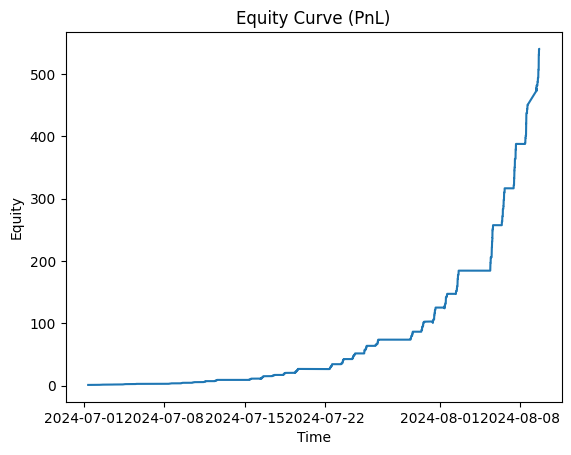

In [12]:
plt.plot(results['equity_curve'])
plt.title('Equity Curve (PnL)')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.show()

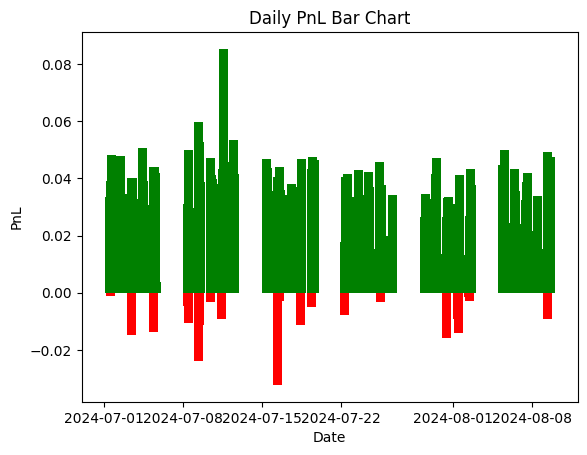

Daily PnL values:
datetime
2024-07-01 09:20:00    0.0
2024-07-01 09:25:00   -0.0
2024-07-01 09:30:00   -0.0
2024-07-01 09:35:00   -0.0
2024-07-01 09:40:00   -0.0
Name: daily_pnl, dtype: float64


In [13]:
results['daily_pnl'] = results['strategy_returns']
# Bar chart of daily PnL
colors = ['g' if x >= 0 else 'r' for x in results['daily_pnl'].fillna(0)]
plt.figure()
plt.bar(results.index, results['daily_pnl'], color=colors)
plt.title('Daily PnL Bar Chart')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.show()
print("Daily PnL values:")
print(results['daily_pnl'].dropna().head())
results[['strategy_returns']].to_csv('results/pnl_series.csv')